
# Real neural nets


**What will we do today**: Build neural networks and train them on real world data. 



***RealPrice***

RealPrice is a California-based company that uses machine learning technology to accurately determine the real price of properties in the state. With the help of advanced algorithms and vast amounts of data, RealPrice is able to provide customers with detailed and accurate valuations of properties in real-time. This allows individuals and businesses to make more informed decisions about buying, selling, and investing in real estate. By leveraging the power of machine learning, RealPrice is able to provide its customers with a level of precision and accuracy that was previously unattainable.

Importing all non-tensorflow stuff

In [ ]:
!pip uninstall tensorflowjs
!pip install tensorflowjs

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Import tensorflow and keras (when you run this it should output the version 
as 2.9.*)

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Load in the dataset


In [5]:
# note: median income is in tens of thousands of dollars 

columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

train_data = pd.read_csv("/content/sample_data/california_housing_train.csv", names=columns, skiprows=[0])
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv", names=columns, skiprows=[0])

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Seperate out labels (median_house_value)

In [6]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop("median_house_value")
test_labels = test_features.pop("median_house_value")

train_labels.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [10]:
train_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


Non-normalised data: 

In [5]:
train_data.describe().transpose()[['mean', 'std']]

,mean,std
longitude,-119.562108,2.005166
latitude,35.625225,2.137340
housing_median_age,28.589353,12.586937
total_rooms,2643.664412,2179.947071
total_bedrooms,539.410824,421.499452
population,1429.573941,1147.852959
households,501.221941,384.520841
median_income,3.883578,1.908157
median_house_value,207300.912353,115983.764387


Create a normaliser

In [7]:
input_normaliser = tf.keras.layers.Normalization(axis=-1)
input_normaliser.adapt(np.array(train_features))



Scale down y

In [8]:
scale_value = 10_000


train_labels /= scale_value
test_labels /= scale_value

# Start Generating predictions! 

Build the Neural Network

In [9]:
model = tf.keras.Sequential([
    input_normaliser,
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='linear')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
stats = model.fit(
    train_features,
    train_labels,
    epochs = 100,
    verbose = False,
    batch_size=64,
    use_multiprocessing=True,
    validation_data = (test_features, test_labels)
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,570
Trainable params: 5,553
Non-trainable params: 17
_____________________________________________________

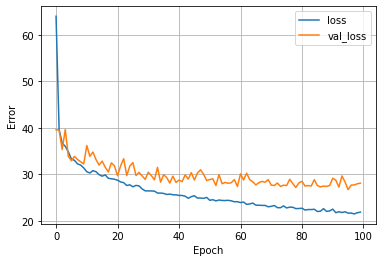

In [10]:
plt.plot(stats.history['loss'], label='loss')
plt.plot(stats.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)



94/94 [==============================] - 0s 2ms/step


[]

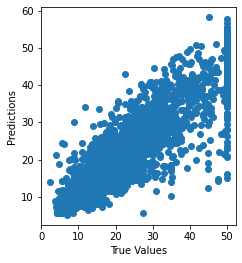

In [11]:

test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot()

# Should be y

Save the model

In [12]:
filepath = "/content/sample_data/housing_model.h5"

model.save(filepath)



Export it so it can be used in JS 

In [13]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "/content/sample_data/tensorflowjs")

weight count with shape () and dtype int64 was auto converted to the type int32
